minimise ||Ax-b|| 

l1 norm is just the sum of values
l2 norm is sqrt(sum of squares) 
l_inf norm is (sum of values ^inf)^/inf which is just the maximum value

In [28]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import multiprocessing as mp
import seaborn as sns
sns.set()
sns.set_context('poster')

from scipy.optimize import linprog

In [29]:
A1 = sio.loadmat('./data/A1.mat')["A1"]
A2 = sio.loadmat('./data/A2.mat')["A2"]
A3 = sio.loadmat('./data/A3.mat')["A3"]
A4 = sio.loadmat('./data/A4.mat')["A4"]
A5 = sio.loadmat('./data/A5.mat')["A5"]

b1 = sio.loadmat('./data/b1.mat')["b1"]
b2 = sio.loadmat('./data/b2.mat')["b2"]
b3 = sio.loadmat('./data/b3.mat')["b3"]
b4 = sio.loadmat('./data/b4.mat')["b4"]
b5 = sio.loadmat('./data/b5.mat')["b5"]

all_A = [A1, A2, A3, A4, A5]
all_b = [b1, b2, b3, b4, b5]
pairs = list(zip(all_A, all_b))

In [30]:
# inf norm
norms = []
residuals = []
runtimes = []
for current_A, current_b in pairs:
    A = np.append(-current_A, current_A, axis=0)
    A = np.append(A, np.ones(A.shape[0]).reshape(-1,1), axis=1)

    c = np.append(np.zeros(A.shape[1]-1), np.ones(1), axis=0)

    print(c.shape, A.shape)
    b = np.append(-current_b, current_b, axis=0).flatten()
    
    results = linprog(c=c, A_ub=-A, b_ub=-b)
    norms.append(results["fun"])
    current_residuals = np.matmul(current_A, results["x"][:current_A.shape[1]]) - current_b.flatten()
    residuals.append(current_residuals)
    runtimes.append(results["nit"])

(17,) (64, 17)
(65,) (256, 65)
(257,) (1024, 257)
(513,) (2048, 513)
(1025,) (4096, 1025)


In [31]:
residuals[4]

array([-1.16672920e+00, -8.22579295e-01, -7.77156117e-16, ...,
       -4.58069988e-01,  1.90199582e-01,  6.75953858e-01])

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   4.,   3.,
          3.,   5.,   8.,   6.,  19.,  17.,  17.,  18.,  25.,  25.,  30.,
         23.,  30.,  30.,  37.,  26.,  27.,  30.,  29.,  35.,  39.,  24.,
         32.,  33.,  26.,  27.,  35.,  19.,  31.,  27.,  35.,  24.,  23.,
         32.,  20.,  22.,  13.,  16., 177.,  15.,  22.,  26.,  29.,  29.,
         38.,  31.,  21.,  30.,  22.,  32.,  26.,  26.,  35.,  30.,  30.,
         25.,  31.,  38.,  31.,  40.,  34.,  26.,  22.,  22.,  25.,  38.,
         20.,  29.,  17.,  15.,  22.,  15.,  14.,  10.,   4.,   6.,   5.,
          8.,   3.,   3.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([-1.5       , -1.46969697, -1.43939394, -1.40909091, -1.37878788,
        -1.34848485, -1.31818182, -1.28787879, -1.25757576, -1.22727273,
        -1.1969697 , -1.16666667, -1.13636364, -1.10606061, -1.07575758,
        -1.04545455, -1.01515152, -0.98484848, -0.95454545, -0.92424242,
        -0.89393939, -0.86363636, -0.833

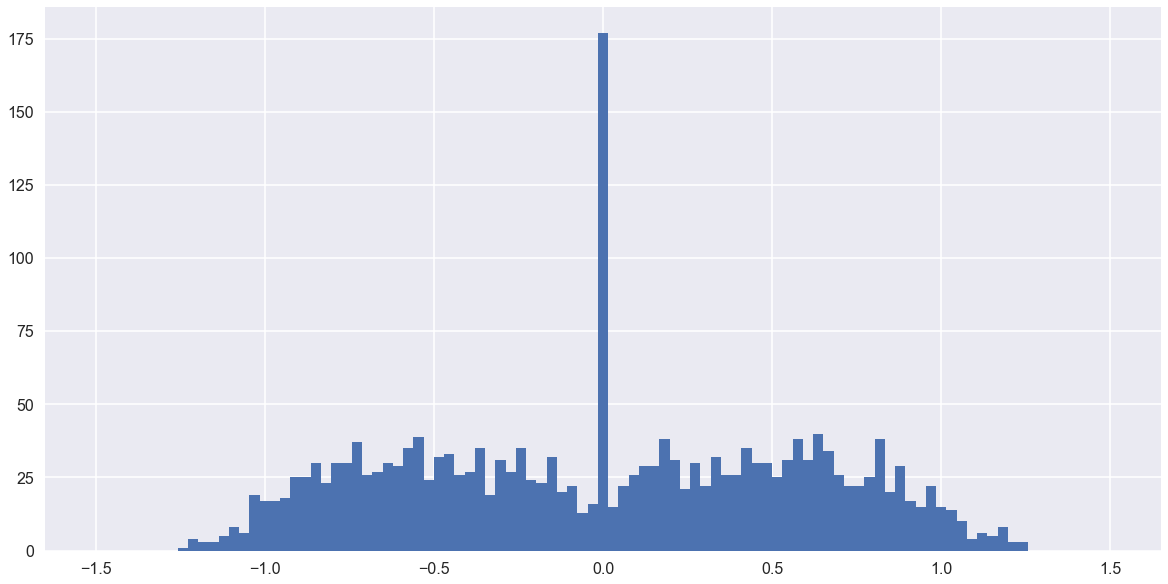

In [32]:
plt.figure(figsize=(20,10))
plt.hist(residuals[4], bins=np.linspace(-1.5, 1.5, 100))

In [33]:
# 1 norm
# A is mxn, x is n, b is m
norms_1 = []
residuals_1 = []
runtimes_1 = []
for current_A, current_b in pairs:

    A = np.append(-current_A, current_A, axis=0)
    A = np.append(A, np.append(np.eye(current_A.shape[0]), np.eye(current_A.shape[0]), axis=0), axis=1)

    c = np.append(np.zeros(current_A.shape[1]), np.ones(current_A.shape[0]), axis=0)
    b = np.append(-current_b, current_b, axis=0).flatten()

    results_1 = linprog(c=c, A_ub=-A, b_ub=-b)
    
    norms_1.append(results_1["fun"])
    current_residuals = np.matmul(current_A, results_1["x"][:current_A.shape[1]]) - current_b.flatten()
    residuals_1.append(current_residuals)
    runtimes_1.append(results_1["nit"])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


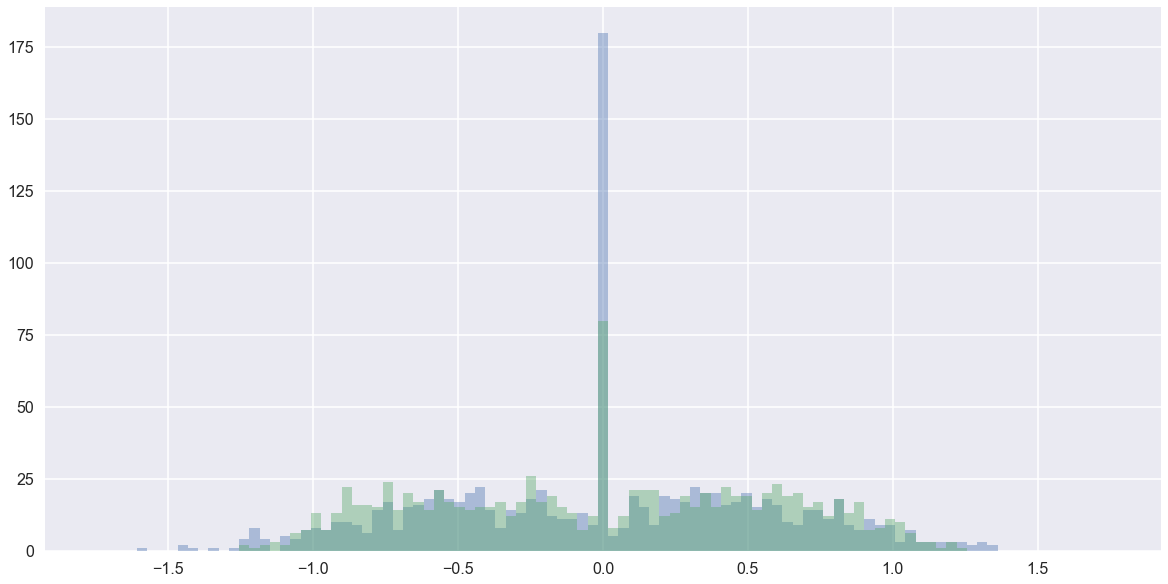

In [34]:
plt.figure(figsize=(20,10))
sns.distplot(residuals_1[4][:A5.shape[1]], bins=np.linspace(-1.75, 1.75, 100), kde=False)
sns.distplot(residuals[4][:A5.shape[1]], bins=np.linspace(-1.75, 1.75, 100), kde=False)

In [35]:
# l2 norm
norms_2 = []
residuals_2 = []
runtimes_2 = []
for current_A, current_b in pairs:

    x, residuals_sum, rank, s = np.linalg.lstsq(current_A, current_b)
    residuals_2.append(np.matmul(current_A, x) - current_b)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  import sys


In [36]:
residuals_2[4]

array([[-0.80108872],
       [ 0.27749212],
       [ 0.49030313],
       ...,
       [-0.44174424],
       [-0.15052954],
       [-0.18644094]])

(-1.75, 1.75)

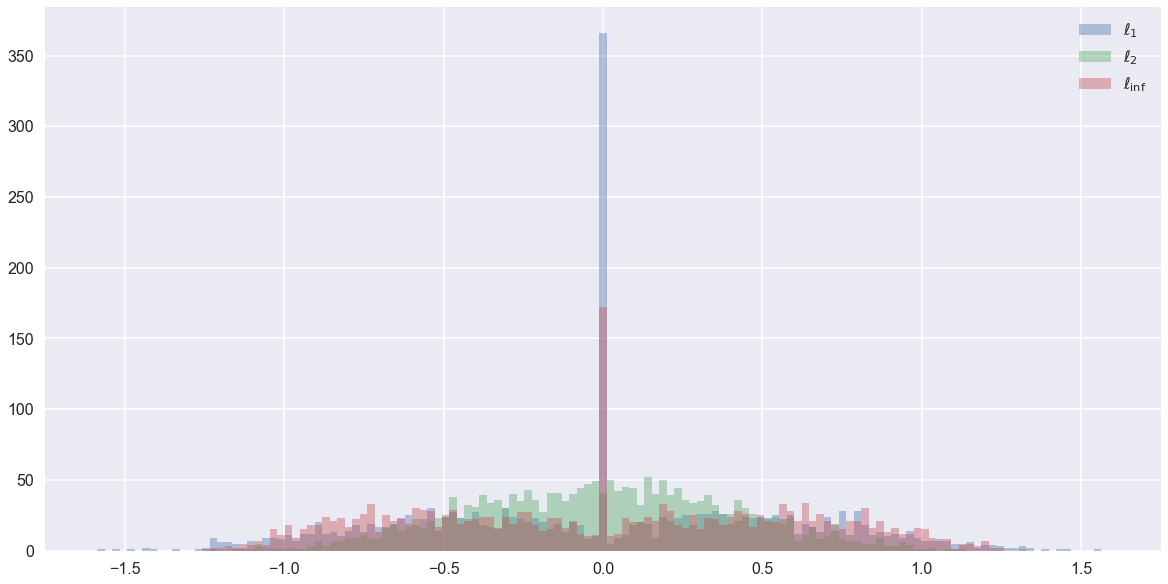

In [37]:
plt.figure(figsize=(20,10))
sns.distplot(residuals_1[4], bins=np.linspace(-1.75, 1.75, 150), kde=False)
sns.distplot(residuals_2[4], bins=np.linspace(-1.75, 1.75, 150), kde=False)
sns.distplot(residuals[4], bins=np.linspace(-1.75, 1.75, 150), kde=False)
plt.legend([r'$\ell_{1}$', r'$\ell_{2}$', r'$\ell_{\inf}$'])
plt.xlim([-1.75, 1.75])

In [38]:
l1 and linf look remarkably similar. l1 minimises the sum of residuals, but linf minimises the max residual. Repeatedly minimising the maximum residual is almost equivalent to jointly minimising the sum of residuals.

SyntaxError: invalid syntax (<ipython-input-38-9c6867ec07b1>, line 1)